<a href="https://colab.research.google.com/github/syntizen/Rafid/blob/main/Rafid_v1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the input parameters
daily_hours = 8

# Parameters for Laser process
laser_cycle_time = 5           #min
laser_batch_pieces = 10        #pieces
laser_man_hour = 2             #man?
laser_breakdown_rate = 1 / 60  #/hour
laser_availability = 30 / 60   #/hour
laser_material = 0 / 60        #/hour

# Parameters for Bending process
bending_cycle_time = 7
bending_batch_pieces = 10
bending_man_hour = 2
bending_breakdown_rate = 3 / 100
bending_availability = 1 / 100
bending_material = 15 / 100

# Parameters for Foaming process
foaming_cycle_time = 8
foaming_batch_pieces = 20
foaming_man_hour = 6
foaming_breakdown_rate = 0.5 / 100
foaming_availability = 10 / 100
foaming_material = 5 / 100

# Define the date range for the schedule
dates = pd.date_range(start="2024-12-06", periods=1).strftime("%m/%d/%Y").tolist()

# Initialize the output array
output = []
laser_breakdowns = []
bending_breakdowns = []
foaming_breakdowns = []

# Function to calculate the output for a given process
def calculate_output(cycle_time, batch_pieces, man_hour, breakdown_rate, availability, material, daily_hours):
    breakdown_min = np.random.exponential(breakdown_rate   * 60)  # Example rate for breakdown
    absenteeism_min = np.random.exponential(availability   * 60)  # Example rate for absenteeism
    material_shortage_min = np.random.exponential(material * 60)  # Example rate for material shortage
    effective_minutes = 60 - (breakdown_min + absenteeism_min + material_shortage_min)
    output_value =  (effective_minutes / cycle_time) * batch_pieces
    return int(output_value), breakdown_min, absenteeism_min, material_shortage_min

# Calculate the values for each process and each day
for date in dates:
    for hour in range(1, daily_hours + 1):
        # Laser process
        laser_output, laser_breakdown, laser_absenteeism, laser_material_shortage = calculate_output(
            laser_cycle_time, laser_batch_pieces, laser_man_hour, laser_breakdown_rate, laser_availability, laser_material, hour)
        output.append([date, hour, 'Laser', laser_breakdown, laser_absenteeism, laser_material_shortage, laser_output])
        laser_breakdowns.append(laser_breakdown)

        # Bending process
        bending_output, bending_breakdown, bending_absenteeism, bending_material_shortage = calculate_output(
            bending_cycle_time, bending_batch_pieces, bending_man_hour, bending_breakdown_rate, bending_availability, bending_material, hour)
        output.append([date, hour, 'Bending', bending_breakdown, bending_absenteeism, bending_material_shortage, bending_output])
        bending_breakdowns.append(bending_breakdown)

        # Foaming process
        foaming_output, foaming_breakdown, foaming_absenteeism, foaming_material_shortage = calculate_output(
            foaming_cycle_time, foaming_batch_pieces, foaming_man_hour, foaming_breakdown_rate, foaming_availability, foaming_material, hour)
        output.append([date, hour, 'Foaming', foaming_breakdown, foaming_absenteeism, foaming_material_shortage, foaming_output])
        foaming_breakdowns.append(foaming_breakdown)

# Convert the output to a DataFrame for better representation
output_df = pd.DataFrame(output, columns=['Date', 'Hour', 'Machine', 'Breakdown-min', 'Absentiesm-min', 'Material shortage-min', 'Output'])

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

# Display the  output DataFrame
print(output_df)

# Save to a CSV file (optional)
#output_df.to_csv('generated_output_schedule.csv', index=False)


          Date  Hour  Machine  Breakdown-min  Absentiesm-min  Material shortage-min  Output
0   12/06/2024     1    Laser       0.196230       10.788253               0.000000      98
1   12/06/2024     1  Bending       2.294792        0.822386              13.671544      61
2   12/06/2024     1  Foaming       0.214547       18.552104               0.498758     101
3   12/06/2024     2    Laser       0.424616       42.330451               0.000000      34
4   12/06/2024     2  Bending       1.661708        2.071775               6.704235      70
5   12/06/2024     2  Foaming       0.306550        7.669227               5.097051     117
6   12/06/2024     3    Laser       0.649043       70.897857               0.000000     -23
7   12/06/2024     3  Bending       0.148079        0.211962               7.117300      75
8   12/06/2024     3  Foaming       0.474798        3.488712               4.960624     127
9   12/06/2024     4    Laser       0.909873       75.031613               0.000

In [2]:
#np.random.exponential(0.5   * 60)  # Example rate for absenteeism


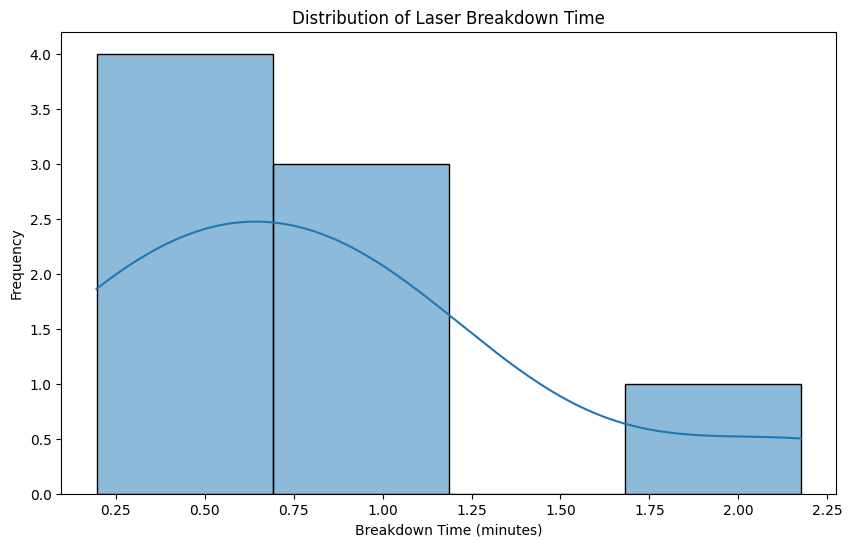

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(laser_breakdowns, kde=True)
plt.title('Distribution of Laser Breakdown Time')
plt.xlabel('Breakdown Time (minutes)')
plt.ylabel('Frequency')
plt.show()

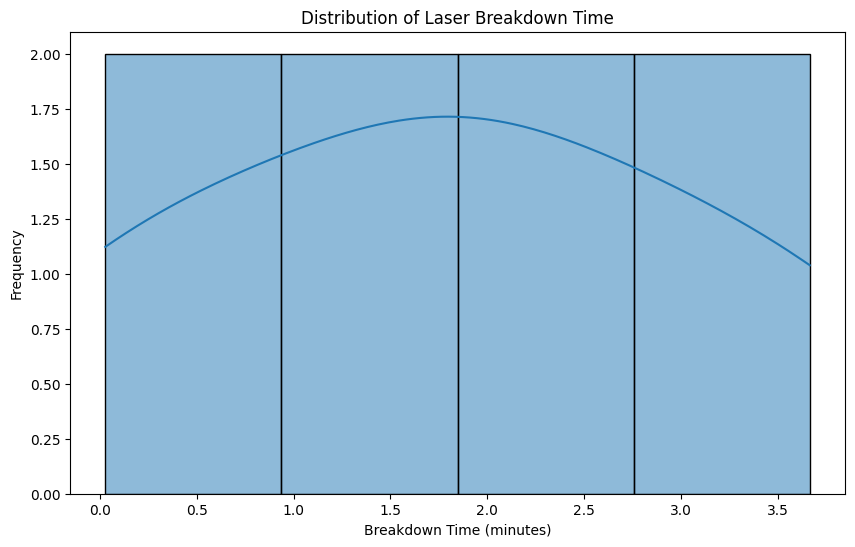

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(bending_breakdowns, kde=True)
plt.title('Distribution of Laser Breakdown Time')
plt.xlabel('Breakdown Time (minutes)')
plt.ylabel('Frequency')
plt.show()

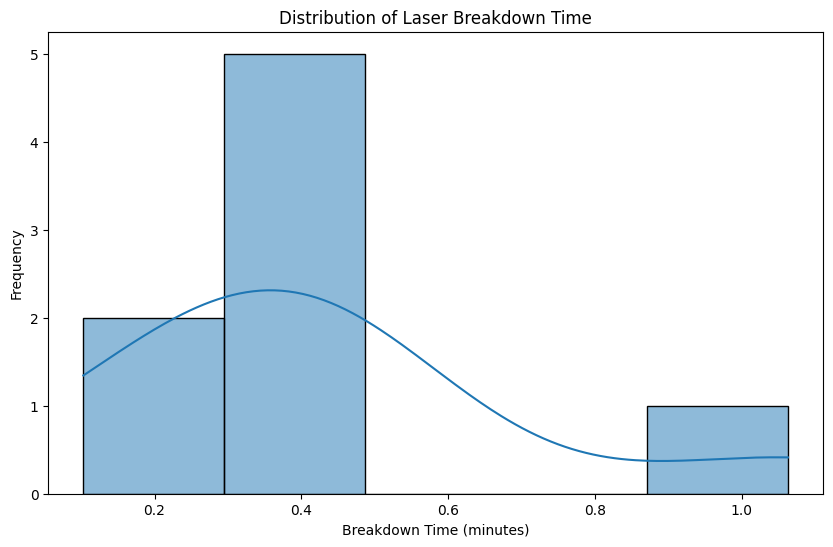

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(foaming_breakdowns, kde=True)
plt.title('Distribution of Laser Breakdown Time')
plt.xlabel('Breakdown Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [6]:
next

<function next>